# 의사결정나무

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
# 데이터셋
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/5팀_공유폴더/작업결과물/dataset/train/train-new_label.csv')
# test = pd.read_csv('/content/drive/MyDrive/5팀_공유폴더/작업결과물/dataset/test/test(CAGR적용_레이블).csv')


In [64]:
train = train[['고객번호', 'Monetary', 'A_Monetary_실제지출', 'B_Monetary_실제지출',
       'C_Monetary_실제지출', 'D_Monetary_실제지출', 'fluctuation', 'A_fluctuation', 'B_fluctuation',
       'C_fluctuation', 'D_fluctuation', '고급_fluctuation', '일반_fluctuation',
       '편의_fluctuation', '선매_fluctuation', '전문_fluctuation', 'cagr']]
# test = test[['고객번호', 'Monetary', 'A_Monetary_실제지출', 'B_Monetary_실제지출',
#        'C_Monetary_실제지출', 'D_Monetary_실제지출', 'fluctuation', 'A_fluctuation', 'B_fluctuation',
#        'C_fluctuation', 'D_fluctuation', '고급_fluctuation', '일반_fluctuation',
#        '편의_fluctuation', '선매_fluctuation', '전문_fluctuation', 'cagr']]

train = train.set_index('고객번호')
# test = test.set_index('고객번호')

X_train = train.drop(['cagr'], axis=1)
y_train = train['cagr'].astype('int')
# X_test = test.drop(['cagr'], axis=1)
# y_test = test['cagr']

In [ ]:
# train.columns[train.columns.str.contains('제휴사')]
# pd.get_dummies(train[['sa', '구매금액이큰제휴사', '방문빈도가높은제휴사']])
# train[['sa', '구매금액이큰제휴사', '방문빈도가높은제휴사']] = train[['sa', '구매금액이큰제휴사', '방문빈도가높은제휴사']].astype('category')
# test[['sa', '구매금액이큰제휴사', '방문빈도가높은제휴사']] = test[['sa', '구매금액이큰제휴사', '방문빈도가높은제휴사']].astype('category')

# train = train.drop(['Unnamed: 0', 'sa', '구매금액이큰제휴사', '방문빈도가높은제휴사'], axis=1)
# test = test.drop(['Unnamed: 0', 'sa', '구매금액이큰제휴사', '방문빈도가높은제휴사'], axis=1)

# train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Columns: 127 entries, 고객번호 to cagr
dtypes: float64(110), int64(17)
memory usage: 18.8 MB


In [65]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier(max_depth=4) 
dt_clf_model = dt_clf.fit(X_train, y_train)
dt_clf_model.feature_importances_

array([0.221986  , 0.08006131, 0.09033739, 0.        , 0.        ,
       0.20191849, 0.        , 0.        , 0.        , 0.        ,
       0.3573863 , 0.02863447, 0.        , 0.01967604, 0.        ])

In [44]:
# X_train_x = ['Monetary', 'A_Monetary_실제지출', 'B_Monetary_실제지출', 'C_Monetary_실제지출',
#        'D_Monetary_실제지출', 'fluctuation', 'A_fluctuation', 'B_fluctuation',
#        'C_fluctuation', 'D_fluctuation', '고급_fluctuation',
#        '일반_fluctuation', '편의_fluctuation', '선매_fluctuation',
#        '전문_fluctuation']

In [66]:
y_train

고객번호
1        0
2        0
3        0
4        0
5        0
        ..
19379    0
19380    0
19381    0
19382    0
19383    0
Name: cagr, Length: 19372, dtype: int64

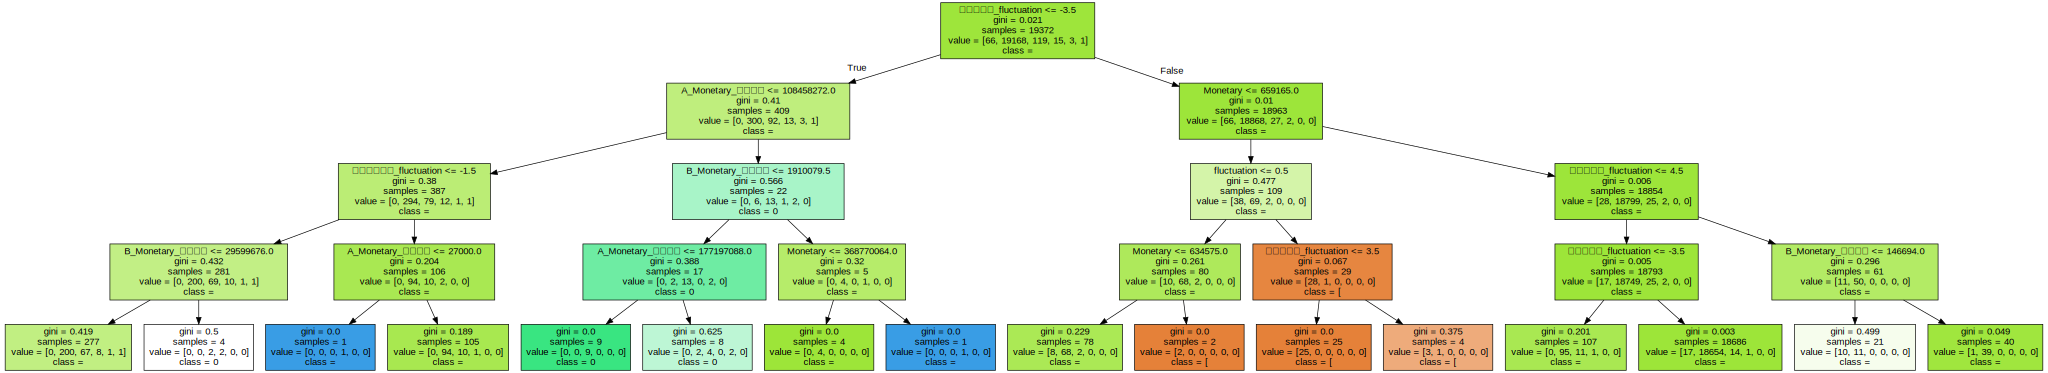

In [68]:
## Visualizing Tree using Graphviz
from sklearn import tree
import graphviz

## exporting tree in DOT format
## refer to: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
tree_dot = tree.export_graphviz(
    dt_clf_model, 
    feature_names=X_train.columns, 
    class_names=str(y_train.unique()),
    filled=True, # 그림에 색상을 넣을것인가
    # special_characters = True # 특수문자를 사용하나
)
dt_graph = graphviz.Source(tree_dot, format='png')
dt_graph

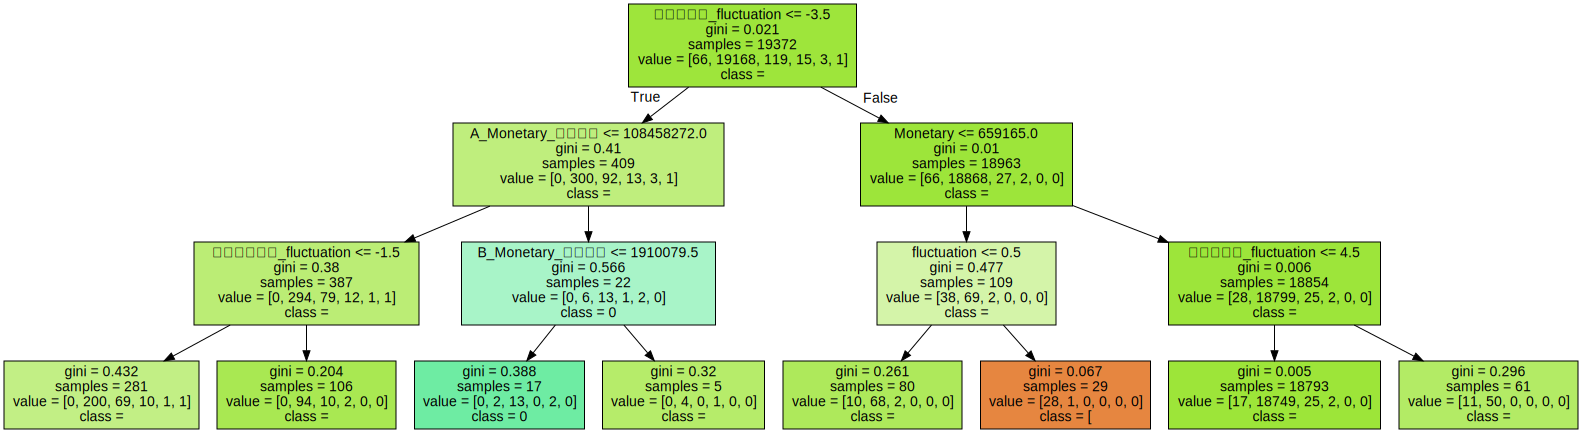

In [69]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier(max_depth=3) 
dt_clf_model = dt_clf.fit(X_train, y_train)
dt_clf_model.feature_importances_

## Visualizing Tree using Graphviz
from sklearn import tree
import graphviz

## exporting tree in DOT format
## refer to: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
tree_dot = tree.export_graphviz(
    dt_clf_model, 
    feature_names=X_train.columns, 
    class_names=str(y_train.unique()),
    filled=True
)
dt_graph = graphviz.Source(tree_dot, format='png')
dt_graph

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
tree.plot_tree(dt_clf_model,\
              feature_names = X_train.columns,   #예측 변수명 \ 
              class_names = ['0','1'],    #타겟 변수 클래스, 알파벳순 \ 
               filled = True,                  #색칠 \
               proportion = True,              #비율 표기 \
               rounded = True,                #둥근테두리 \ 
               impurity = False,                #불순도 표시 \
               label = 'root',                  #label 표시 위치\
               fontsize = 10 ); # ; 쓰면 메세지 안나오게 할 수 잇음

In [20]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/5팀_공유폴더/작업결과물/etc./최종예측결과.csv')
df.head()

,고객번호,fluctuation,f_커리어,f_소형가전,f_셔츠,f_모피피혁,f_시티웨어,f_골프용품,f_통신컴퓨터,f_주방가전,...,f_남성 트랜디,f_축산가공,f_남성정장,f_명품,Monetary,A_Monetary_실제지출,B_Monetary_실제지출,C_Monetary_실제지출,D_Monetary_실제지출,pred
0,1,1.0,-4.0000,0.0001,7.0000,0.0000,5.0000,3.0000,0.0000,-8.0000,...,0.0000,5.0000,6.0000,0.0000,70605022.0,83227150.0,790976.0,1024424.0,0.0,0
1,2,0.0,-1.0000,0.0001,0.0000,2.0000,-2.0000,0.0000,0.0001,8.0000,...,0.0001,0.0000,0.0001,0.0000,73756070.0,99454850.0,209450.0,0.0,216460.0,0
2,3,1.0,0.0001,0.0001,4.0000,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,2604284.0,80000.0,6960.0,3078207.0,0.0,0
3,4,1.0,1.0000,0.0001,2.0000,4.0000,2.0000,4.0000,0.0001,0.0001,...,-5.0000,-1.0000,-4.0000,0.0001,13774022.0,14274610.0,1594066.0,825134.0,0.0,0
4,5,5.0,0.0001,0.0001,0.0001,0.0001,5.0000,0.0001,0.0001,0.0001,...,0.0000,9.0000,0.0001,3.0000,7475480.0,13174220.0,16000.0,0.0,46850.0,1


# 의사결정나무 (예제)

In [26]:
from sklearn import tree
from sklearn.datasets import load_iris
from os import system 

In [27]:
iris = load_iris()

In [28]:
clf = tree.DecisionTreeClassifier()               # 종속변수가 현재 범주형
clf = clf.fit(iris.data, iris.target)             # feature, target

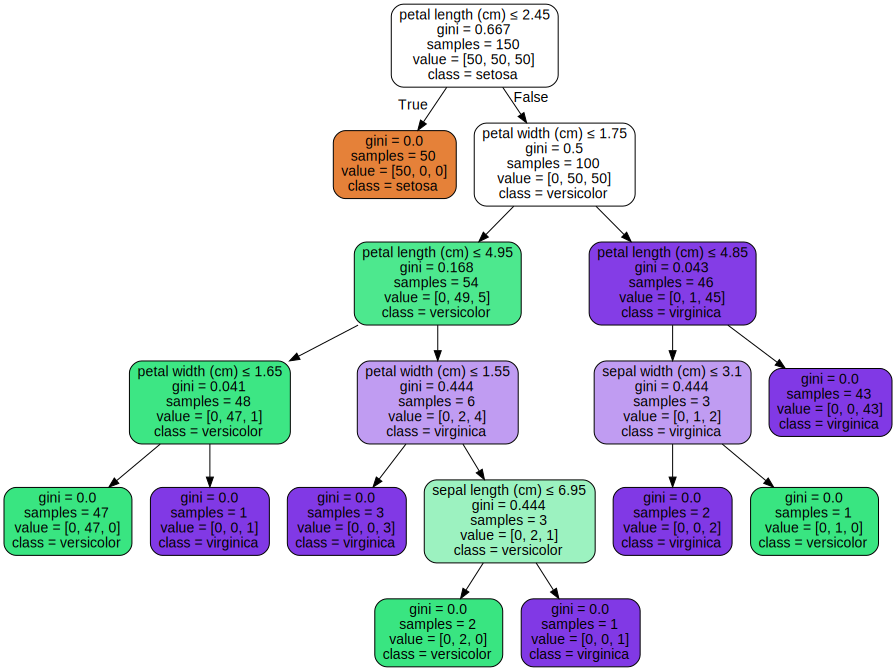

In [29]:
dot_data = tree.export_graphviz(clf,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = iris.feature_names,  # feature 이름
                               class_names = iris.target_names,  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = graphviz.Source(dot_data)              
graph

In [47]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
df['pred'].unique()

array([0, 1])

In [42]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']